In [1]:
import ROOT

Welcome to JupyROOT 6.30/04


In [122]:
ERA = "2018"
MEASURE = "electron"
ETABIN = "EE"

In [123]:
ptcorr_bins = []
abseta_bins = []
if MEASURE == "muon":
    ptcorr_bins = [10., 15., 20., 30., 50., 100.]
    abseta_bins = [0., 0.9, 1.6, 2.4]
elif MEASURE == "electron":
    ptcorr_bins = [10., 15., 20., 25., 35., 50., 100.]
    abseta_bins = [0., 0.8, 1.479, 2.5]
else:
    raise NameError(f"Wrong measure {MEASURE}")

eta_idx = -1
if ETABIN == "EB1": 
    eta_idx = 1
elif ETABIN == "EB2":
    eta_idx = 2
elif ETABIN == "EE":
    eta_idx = 3
else:
    raise NameError(f"Wrong eta bin {ETABIN}")

In [124]:
# prepare canvas and legend
canvas = ROOT.TCanvas("c", "", 1600, 1200)
canvas.SetLeftMargin(0.1)
canvas.SetRightMargin(0.08)
canvas.SetTopMargin(0.1)
canvas.SetBottomMargin(0.12)

legend = ROOT.TLegend(0.67, 0.65, 0.9, 0.85)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [125]:
def setInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(42)

def setLogoTo(text: ROOT.TLatex):
    text.SetTextSize(0.04)
    text.SetTextFont(61)
    
def setWorkInProgressTo(text: ROOT.TLatex):
    text.SetTextSize(0.035)
    text.SetTextFont(52)
    
def setExtraInfoTo(text: ROOT.TLatex):
    text.SetTextSize(0.05)
    text.SetTextFont(42)

In [126]:
file_path = f"../results/{ERA}/ROOT/{MEASURE}/fakerate.root"
f = ROOT.TFile.Open(file_path)
h = f.Get("fake rate - (Central)"); h.SetDirectory(0)
h_prUp = f.Get("fake rate - (PromptNormUp)"); h_prUp.SetDirectory(0)
h_prDown = f.Get("fake rate - (PromptNormDown)"); h_prDown.SetDirectory(0)
h_jetUp = f.Get("fake rate - (MotherJetPtUp)"); h_jetUp.SetDirectory(0)
h_jetDown = f.Get("fake rate - (MotherJetPtDown)"); h_jetDown.SetDirectory(0)
h_btag = f.Get("fake rate - (RequireHeavyTag)"); h_btag.SetDirectory(0)
f.Close()

In [127]:
h_proj_central = h.ProjectionY("central", eta_idx, eta_idx)
h_proj_prUp = h_prUp.ProjectionY("prUp", eta_idx, eta_idx)
h_proj_prDown = h_prDown.ProjectionY("prDown", eta_idx, eta_idx)
h_proj_jetUp = h_jetUp.ProjectionY("jetUp", eta_idx, eta_idx)
h_proj_jetDown = h_jetDown.ProjectionY("jetDown", eta_idx, eta_idx)
h_proj_btag = h_btag.ProjectionY("btag", eta_idx, eta_idx)

In [128]:
# make ratio plots for each systematic sources
ratio_total = h_proj_central.Clone("total")
for bin in range(1, ratio_total.GetNbinsX()+1):
    error = ratio_total.GetBinError(bin) / ratio_total.GetBinContent(bin)
    ratio_total.SetBinContent(bin, 0.)
    ratio_total.SetBinError(bin, error)
    
# promptNorm
ratio_prUp = h_proj_central.Clone("PromptNormUp")
for bin in range(1, ratio_prUp.GetNbinsX()+1):
    content = (h_proj_prUp.GetBinContent(bin) - h_proj_central.GetBinContent(bin))/h_proj_central.GetBinContent(bin)
    ratio_prUp.SetBinContent(bin, content)

# promptNormDown
ratio_prDown = h_proj_central.Clone("PromptNormDown")
for bin in range(1, ratio_prDown.GetNbinsX()+1):
    content = (h_proj_prDown.GetBinContent(bin) - h_proj_central.GetBinContent(bin))/h_proj_central.GetBinContent(bin)
    ratio_prDown.SetBinContent(bin, content)
    
# JetPtUp
ratio_jetUp = h_proj_central.Clone("MotherJetPtUp")
for bin in range(1, ratio_jetUp.GetNbinsX()+1):
    content = (h_proj_jetUp.GetBinContent(bin) - h_proj_central.GetBinContent(bin))/h_proj_central.GetBinContent(bin)
    ratio_jetUp.SetBinContent(bin, content)
    
# JetPtDown
ratio_jetDown = h_proj_central.Clone("MotherJetPtDown")
for bin in range(1, ratio_jetDown.GetNbinsX()+1):
    content = (h_proj_jetDown.GetBinContent(bin) - h_proj_central.GetBinContent(bin))/h_proj_central.GetBinContent(bin)
    ratio_jetDown.SetBinContent(bin, content)
    
# RequireHeavyTag
ratio_btag = h_proj_central.Clone("RequireHeavyTag")
for bin in range(1, ratio_btag.GetNbinsX()+1):
    content = (h_proj_btag.GetBinContent(bin) - h_proj_central.GetBinContent(bin))/h_proj_central.GetBinContent(bin)
    ratio_btag.SetBinContent(bin, content)

In [129]:
# set up ratios
ratio_total.SetStats(0)
ratio_total.SetLineColor(ROOT.kBlack)
ratio_total.GetXaxis().SetTitle("p_{T}^{corr}")
ratio_total.GetXaxis().SetRangeUser(15., 50.)
ratio_total.GetYaxis().SetTitle("#Delta fr / fr")
ratio_total.GetYaxis().CenterTitle()
ratio_total.GetYaxis().SetRangeUser(-1.5, 1.5)

ratio_prUp.SetMarkerStyle(8)
ratio_prUp.SetMarkerSize(2)
ratio_prUp.SetMarkerColor(ROOT.kGreen)
ratio_prDown.SetMarkerStyle(8)
ratio_prDown.SetMarkerSize(2)
ratio_prDown.SetMarkerColor(ROOT.kGreen)

ratio_jetUp.SetMarkerStyle(8)
ratio_jetUp.SetMarkerSize(2)
ratio_jetUp.SetMarkerColor(ROOT.kBlue)
ratio_jetDown.SetMarkerStyle(8)
ratio_jetDown.SetMarkerSize(2)
ratio_jetDown.SetMarkerColor(ROOT.kBlue)

ratio_btag.SetMarkerStyle(8)
ratio_btag.SetMarkerSize(2)
ratio_btag.SetMarkerColor(ROOT.kBlack)

In [130]:
# add to legend
legend.AddEntry(ratio_prUp, "PromptNorm", "p")
legend.AddEntry(ratio_jetUp, "MotherJetPt", "p")
legend.AddEntry(ratio_btag, "RequireHeavyTag", "p")
#legend.AddEntry(ratio_total, "Total", "f")

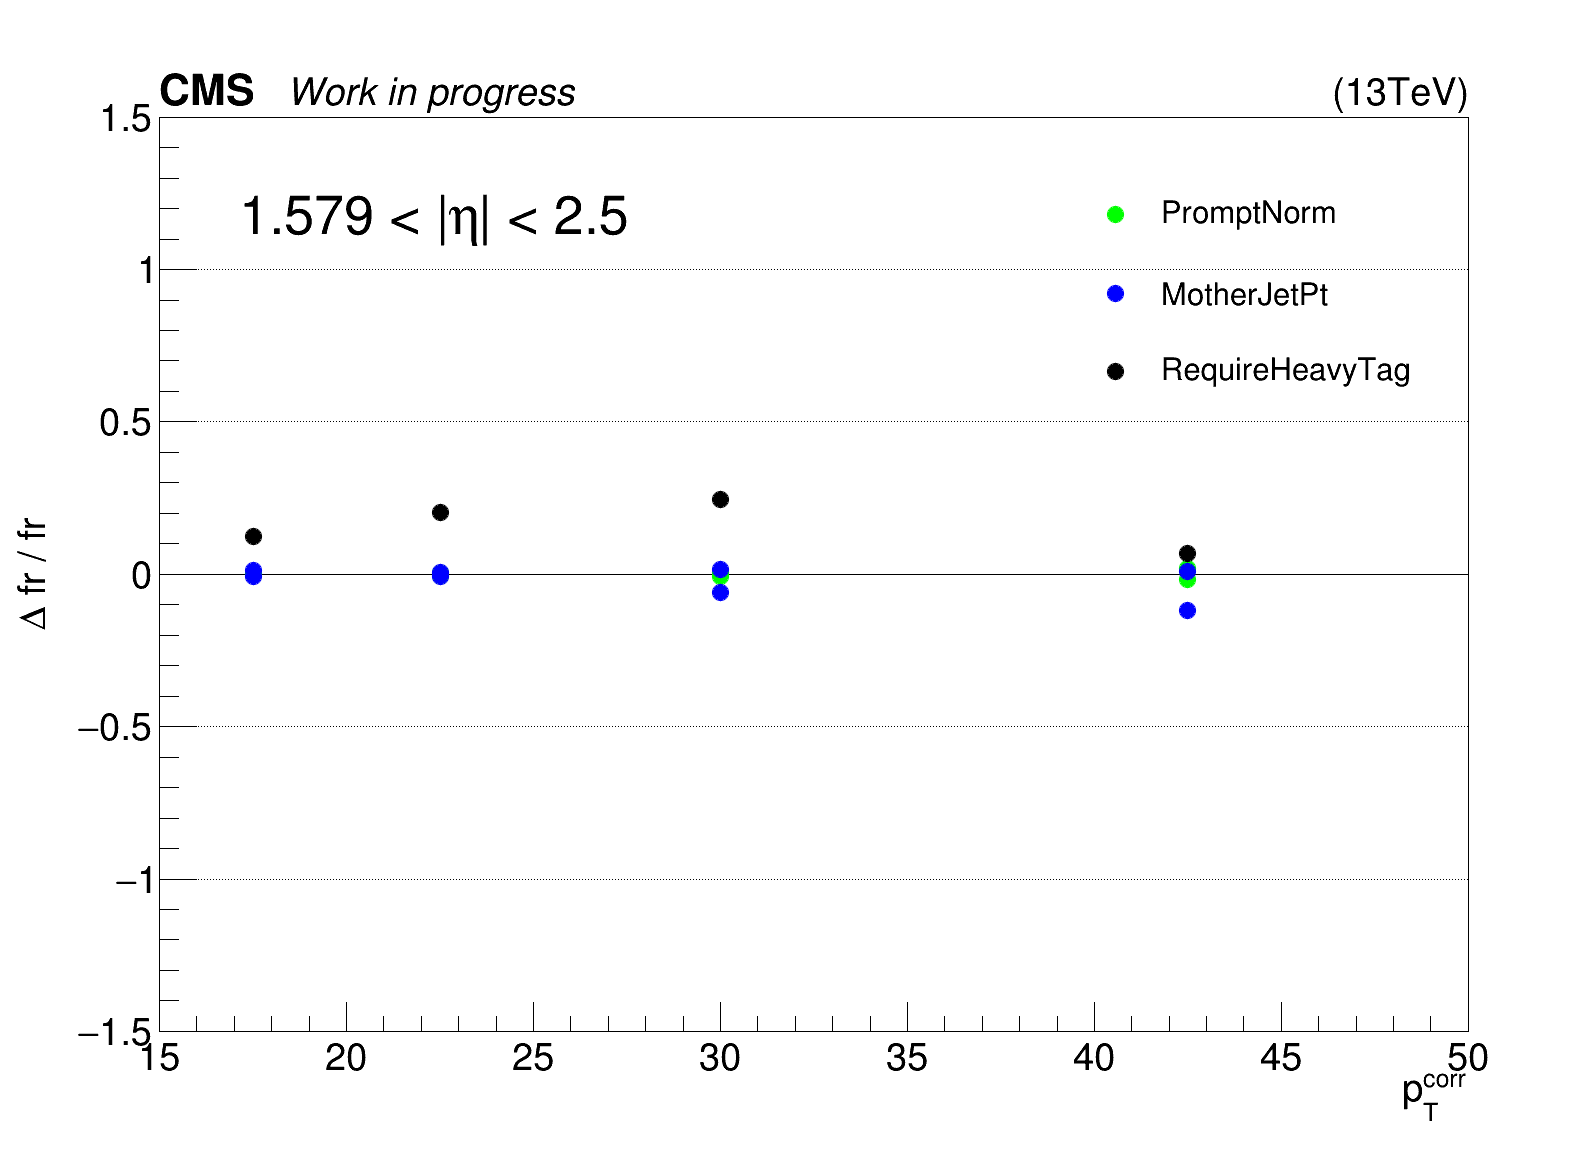

In [131]:
canvas.cd()
canvas.SetGridy(True)
ratio_total.SetTitle("")
ratio_total.Draw("hist")
ratio_prUp.Draw("p&hist&same")
ratio_prDown.Draw("p&hist&same")
ratio_jetUp.Draw("p&hist&same")
ratio_jetDown.Draw("p&hist&same")
ratio_btag.Draw("p&hist&same")
legend.Draw("same")

text = ROOT.TLatex()
setInfoTo(text); text.DrawLatexNDC(0.835, 0.91, "(13TeV)")
setLogoTo(text); text.DrawLatexNDC(0.1, 0.91, "CMS")
setWorkInProgressTo(text); text.DrawLatexNDC(0.18, 0.91, "Work in progress")
setExtraInfoTo(text); text.DrawLatexNDC(0.15, 0.80, f"{abseta_bins[eta_idx-1]} < |#eta| < {abseta_bins[eta_idx]}")

canvas.Draw()